# PRISM gene manual
This is a code for calling genes by manually set the area on color space. Data for HCC2D is shown here and other data can be processed using similar strategy with slightly different parameters.

In [1]:
import os
os.getcwd()

'd:\\3_PRISM\\20251021_2dmouse_huanglab\\20220918_PRISM_Brain_30plex_DAPI_processed\\script'

In [4]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

# CHANNELS = ['cy5', 'TxRed', 'cy3', 'FAM']
CHANNELS = ['cy5', 'TxRed', 'FAM']
BASE_DIR = Path(r"D:/3_PRISM/20251021_2dmouse_huanglab/")
RUN_ID = '20220918_PRISM_Brain_30plex_DAPI_processed'
src_dir = BASE_DIR / f'{RUN_ID}'
read_dir = src_dir / 'readout'
os.makedirs(read_dir, exist_ok=True)

In [5]:
intensity_all = pd.read_csv(read_dir/'intensity_deduplicated.csv')
intensity_all

,Unnamed: 0,Y,X,Channel,R,Ye,B,Scaled_R,Scaled_Ye,Scaled_B,sum,R/A,Ye/A,B/A,X_coor,Y_coor
0,0,12853,20496,cy5,9201,0,0,9201,0,0,9201,1.000000,0.000000,0.0,0.707107,-0.577350
1,1,12851,20493,cy5,8971,0,0,8971,0,0,8971,1.000000,0.000000,0.0,0.707107,-0.577350
2,2,20807,28788,cy5,6253,1110,0,6253,1110,0,7363,0.849246,0.150754,0.0,0.493909,-0.577350
3,3,14156,30880,cy5,6148,1126,0,6148,1126,0,7274,0.845202,0.154798,0.0,0.488189,-0.577350
4,4,12652,30225,cy5,6132,1831,0,6132,1831,0,7963,0.770062,0.229938,0.0,0.381925,-0.577350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987292,8933842,28419,56473,FAM,0,0,101,0,0,101,101,0.000000,0.000000,1.0,0.000000,1.154701
6987293,8933843,35907,44997,FAM,0,0,101,0,0,101,101,0.000000,0.000000,1.0,0.000000,1.154701
6987294,8933844,28031,44599,FAM,0,0,101,0,0,101,101,0.000000,0.000000,1.0,0.000000,1.154701
6987295,8933845,31422,43212,FAM,0,0,101,0,0,101,101,0.000000,0.000000,1.0,0.000000,1.154701


# preprocess of intensity

In [6]:
# Scale
intensity_all['Scaled_R'] = intensity_all['R']
intensity_all['Scaled_Ye'] = intensity_all['Ye']
# intensity_all['Scaled_G'] = intensity_all['G'] * 2.5 没有绿色
intensity_all['Scaled_B'] = intensity_all['B']
# intensity['G/A'] = intensity['G/A'] * np.exp(0.8 * intensity['Ye/A'])

In [7]:
intensity_all['sum'] = intensity_all['Scaled_R'] + intensity_all['Scaled_Ye'] + intensity_all['Scaled_B']
# intensity_all['sum_G'] = intensity_all['Scaled_R'] + intensity_all['Scaled_Ye'] + intensity_all['Scaled_B'] + intensity_all['Scaled_G']
#filter by sum value (QC)
#intensity_all = intensity_all.drop(intensity_all[intensity_all['sum'] < 500].index)
# intensity_all = intensity_all.drop(intensity_all[intensity_all['sum_G'] < 500].index)
# intensity_all = intensity_all.drop(intensity_all[intensity_all['sum'] > 50000].index) # 注释代码，去掉阈值卡点 20250826
intensity_all = intensity_all.dropna()

#intensity_all.to_csv(read_dir/'PRISM_Spot_intensity.csv')
intensity_all['R/A'] = intensity_all['Scaled_R'] / intensity_all['sum']
intensity_all['Ye/A'] = intensity_all['Scaled_Ye'] / intensity_all['sum']
intensity_all['B/A'] = intensity_all['Scaled_B'] / intensity_all['sum']
# intensity_all['G/A'] = intensity_all['Scaled_G'] / intensity_all['sum']
intensity_all['X_coor'] = 2*intensity_all['R/A'] - 1 # 文章中说的Y的计算策略
intensity_all['Y_coor'] = intensity_all['B/A'] - intensity_all['Ye/A'] # 文章中说的X的计算策略，B是CH1，ye是CH2
# intensity_all['G/A'][intensity_all['G/A'] > 5] = 5

In [8]:
intensity_all

,Unnamed: 0,Y,X,Channel,R,Ye,B,Scaled_R,Scaled_Ye,Scaled_B,sum,R/A,Ye/A,B/A,X_coor,Y_coor
0,0,12853,20496,cy5,9201,0,0,9201,0,0,9201,1.000000,0.000000,0.0,1.000000,0.000000
1,1,12851,20493,cy5,8971,0,0,8971,0,0,8971,1.000000,0.000000,0.0,1.000000,0.000000
2,2,20807,28788,cy5,6253,1110,0,6253,1110,0,7363,0.849246,0.150754,0.0,0.698492,-0.150754
3,3,14156,30880,cy5,6148,1126,0,6148,1126,0,7274,0.845202,0.154798,0.0,0.690404,-0.154798
4,4,12652,30225,cy5,6132,1831,0,6132,1831,0,7963,0.770062,0.229938,0.0,0.540123,-0.229938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987292,8933842,28419,56473,FAM,0,0,101,0,0,101,101,0.000000,0.000000,1.0,-1.000000,1.000000
6987293,8933843,35907,44997,FAM,0,0,101,0,0,101,101,0.000000,0.000000,1.0,-1.000000,1.000000
6987294,8933844,28031,44599,FAM,0,0,101,0,0,101,101,0.000000,0.000000,1.0,-1.000000,1.000000
6987295,8933845,31422,43212,FAM,0,0,101,0,0,101,101,0.000000,0.000000,1.0,-1.000000,1.000000


# visualization of intensity

In [9]:
sample = intensity_all.sample(frac=0.05,replace=True, random_state=1)
intensity_all

,Unnamed: 0,Y,X,Channel,R,Ye,B,Scaled_R,Scaled_Ye,Scaled_B,sum,R/A,Ye/A,B/A,X_coor,Y_coor
0,0,12853,20496,cy5,9201,0,0,9201,0,0,9201,1.000000,0.000000,0.0,1.000000,0.000000
1,1,12851,20493,cy5,8971,0,0,8971,0,0,8971,1.000000,0.000000,0.0,1.000000,0.000000
2,2,20807,28788,cy5,6253,1110,0,6253,1110,0,7363,0.849246,0.150754,0.0,0.698492,-0.150754
3,3,14156,30880,cy5,6148,1126,0,6148,1126,0,7274,0.845202,0.154798,0.0,0.690404,-0.154798
4,4,12652,30225,cy5,6132,1831,0,6132,1831,0,7963,0.770062,0.229938,0.0,0.540123,-0.229938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987292,8933842,28419,56473,FAM,0,0,101,0,0,101,101,0.000000,0.000000,1.0,-1.000000,1.000000
6987293,8933843,35907,44997,FAM,0,0,101,0,0,101,101,0.000000,0.000000,1.0,-1.000000,1.000000
6987294,8933844,28031,44599,FAM,0,0,101,0,0,101,101,0.000000,0.000000,1.0,-1.000000,1.000000
6987295,8933845,31422,43212,FAM,0,0,101,0,0,101,101,0.000000,0.000000,1.0,-1.000000,1.000000


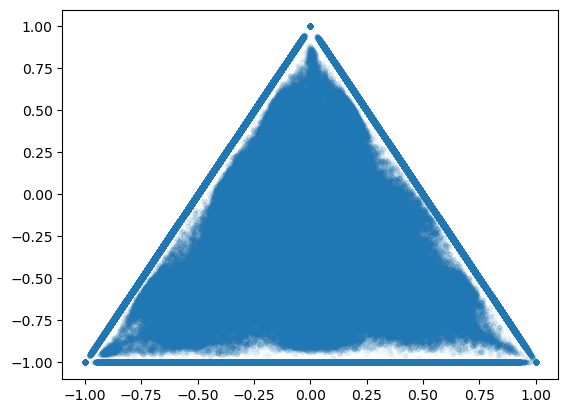

In [10]:
## 直接绘制scatter图像
plt.scatter(intensity_all['Y_coor'],intensity_all['X_coor'],s=10,alpha=0.05,linewidths=None)
plt.savefig(read_dir/'triangle.jpg')

Peaks range of RY [(-1.0, -0.99), (-0.35, 0.3600000000000001), (0.99, 1.0)] 

Peaks range of RB [(-1.0, -0.99), (-0.98, -0.27), (-0.26, 0.26), (0.99, 1.0)] 

Peaks range of BY [(-1.0, -0.99), (-0.45999999999999996, 0.24), (0.25, 0.98), (0.99, 1.0)] 



<Figure size 3750x2250 with 0 Axes>

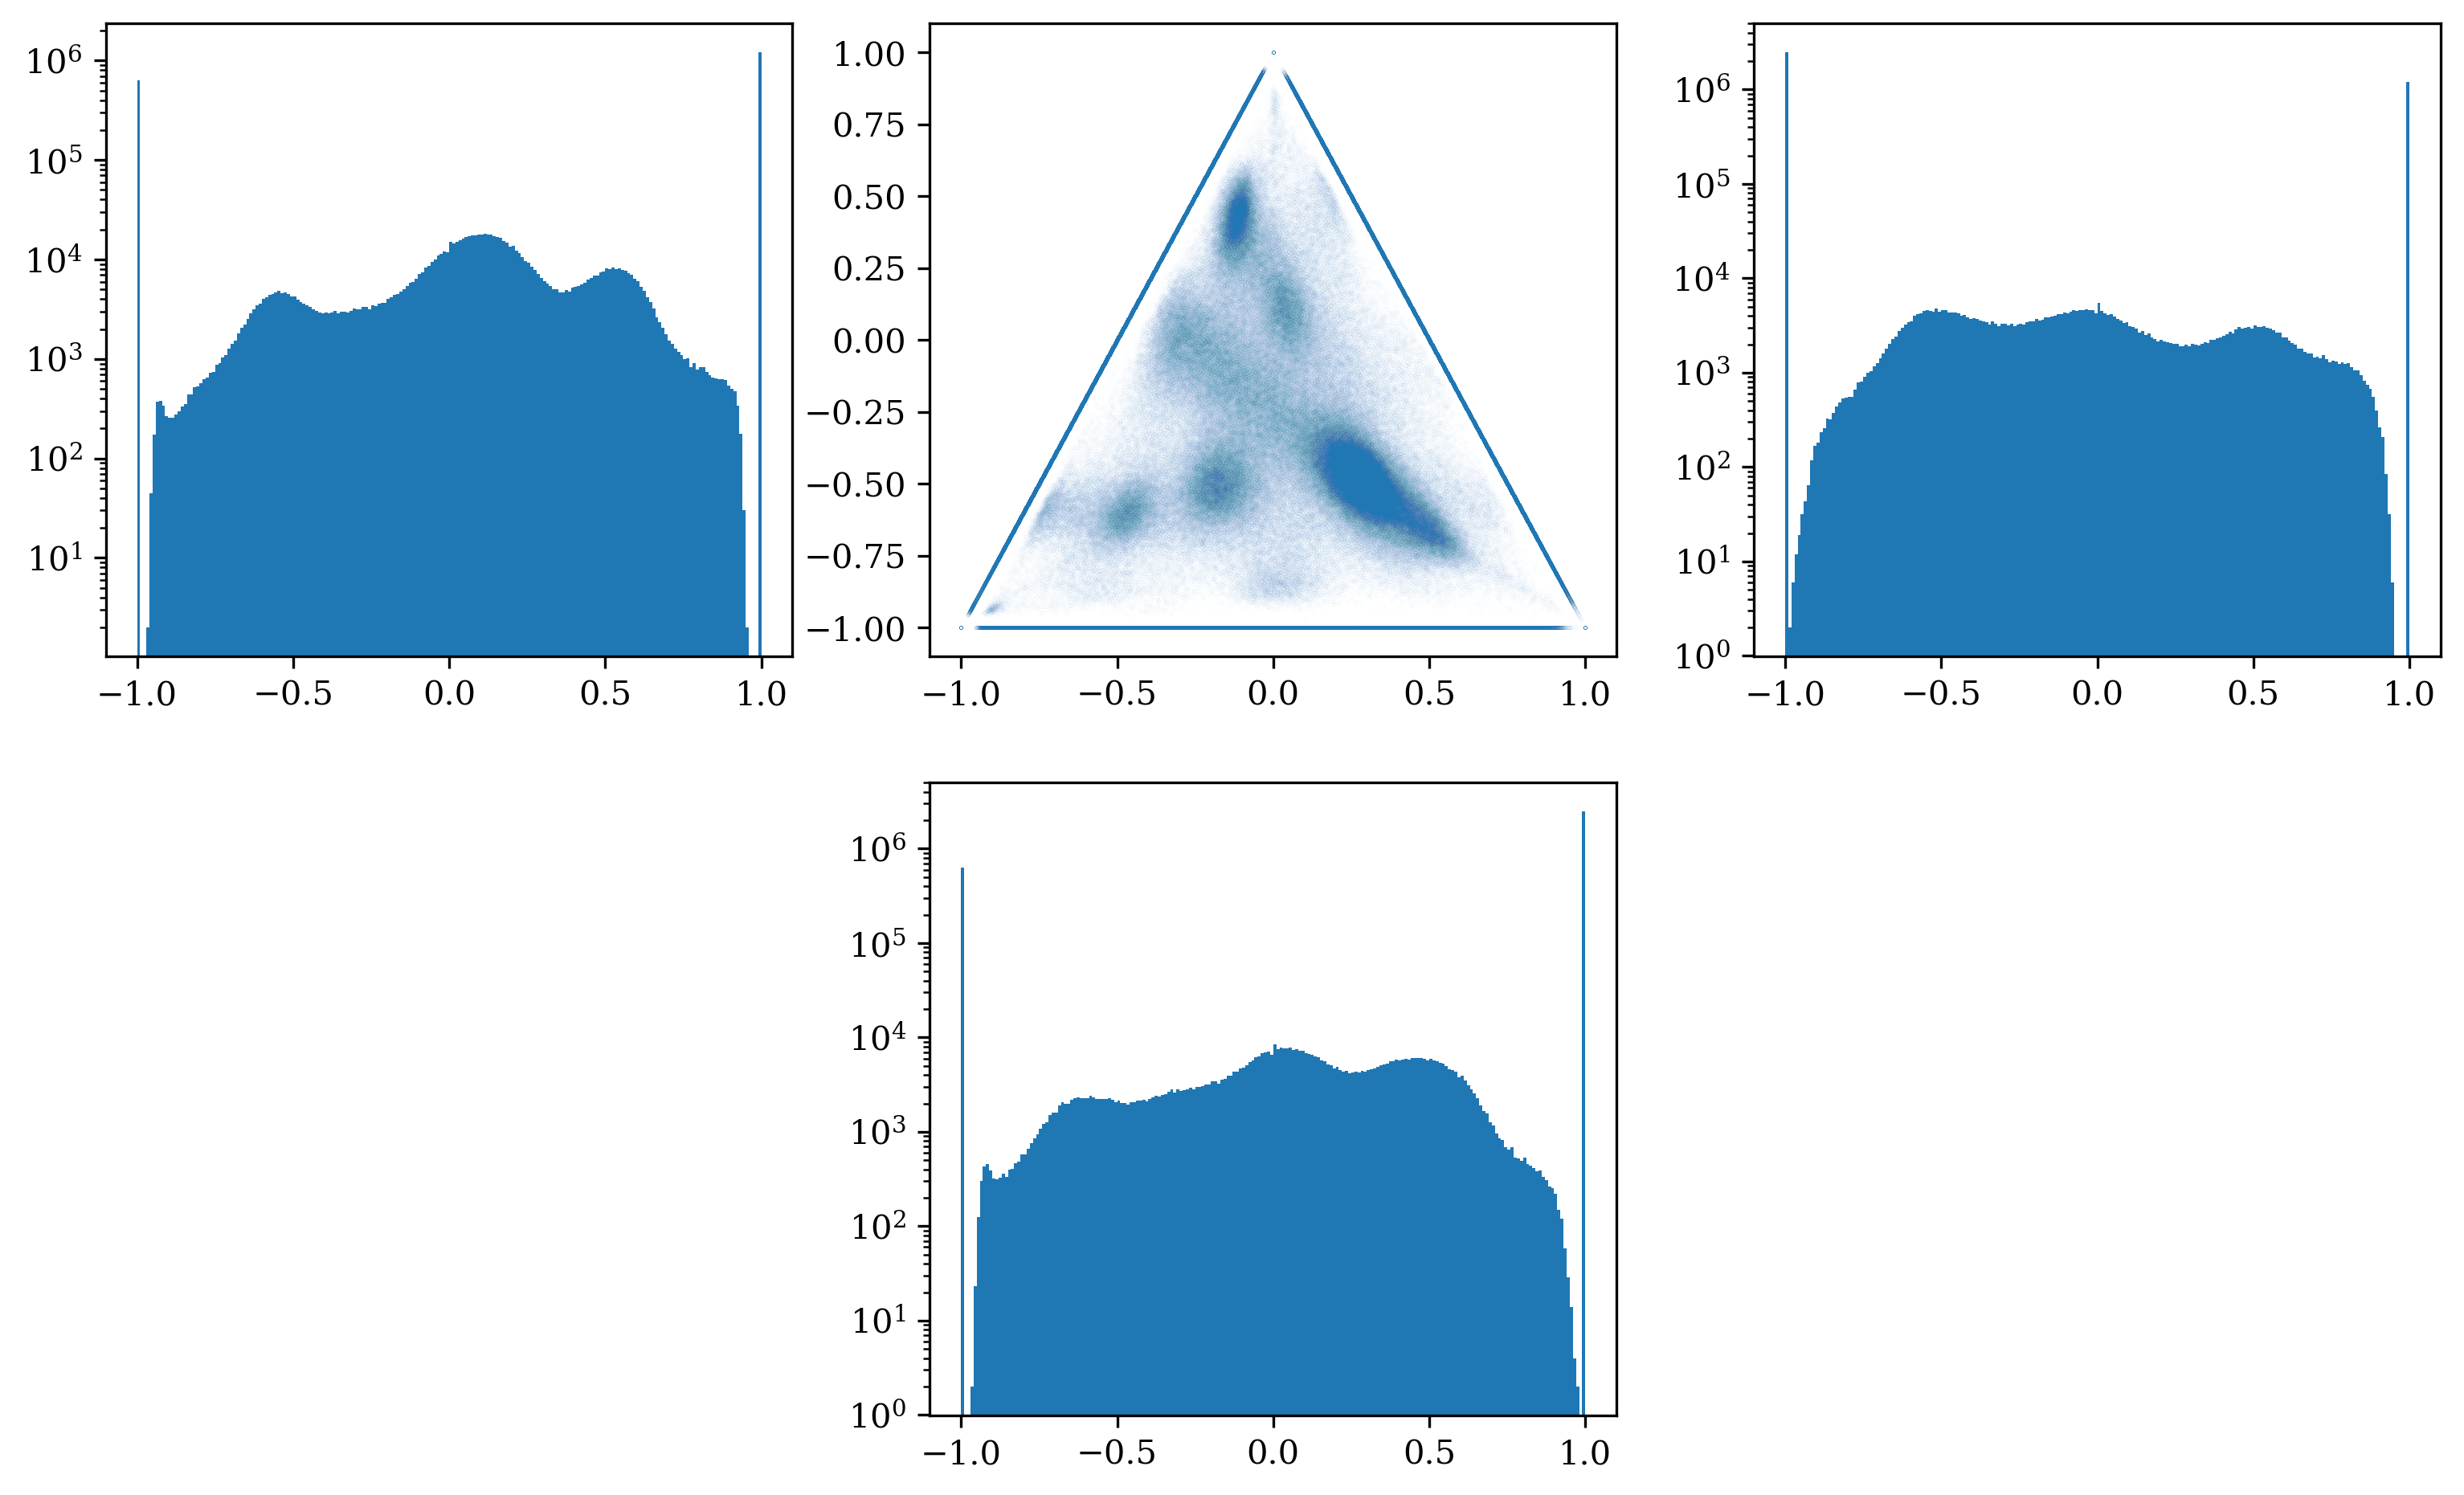

In [11]:
from xml.dom.expatbuilder import InternalSubsetExtractor
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
matplotlib.rcParams.update({
    "pgf.texsystem": "xelatex",
    'font.family': 'serif',
    'text.usetex': False,
    'pgf.rcfonts': False,
    'figure.dpi': 300,
})

# 修改函数，去掉G，G在这里主要用于分层
def plot_freq(intensity, colorline, layer_threshold=0.25, order=5, contraction=0, vlines=True, curvefit_range=None, curvefit_p0=None,curvefit_pvalue=0.05, curvefit_colorset=['red', 'yellow', 'green'], save=False, read_dir=None):
    '''
    Plot a frequency plot.

    Parameters
    -----------
    intensity: pandas dataframe.
    colorline: projection line. 'RY', 'RB' or 'BY'.
    layer: the 4th color. '0G' or '1G'.
    layer_threshold: threshold of the 4th color. For '0G', it is the upper limit. For '1G', it is the lower limit.
    order: how many points on each side to use for the comparison to consider. For details, see scipy.signal.argrelextrema.
    contraction: distance between two peaks (= contraction*2). 
    vlines: whether to plot peak boundaries or not.
    curvefit_range: peak range to fit curve.
    curvefit_p0: initial guess for the parameters (length N). For details, see scipy.optimize.curve_fit.
    save: whether to save the plot alone.
    read_dir: 
    '''
    
    def gaussian(x, mu, sigma, A):
        return A*np.exp(-(x-mu)**2/(2*(sigma**2)))

    def mixgaussian(x, mu1, mu2, mu3, sigma1, sigma2, sigma3, A1, A2, A3):
        return gaussian(x, mu1, sigma1, A1) + gaussian(x, mu2, sigma2, A2) + gaussian(x, mu3, sigma3, A3)

    if colorline == 'RY':
        intensity = intensity[intensity['B/A'] == 0] 
        intensity = intensity['R/A'] - intensity['Ye/A']
    elif colorline == 'RB':
        intensity = intensity[intensity['Ye/A'] == 0]
        intensity = intensity['R/A'] - intensity['B/A']
    elif colorline == 'BY':
        intensity = intensity[intensity['R/A'] == 0]
        intensity = intensity['B/A'] - intensity['Ye/A']

    hist = plt.hist(pd.DataFrame(intensity), bins = 200, log=True)
    freq, bins = hist[0], hist[1]
    extrema_less = argrelextrema(freq, np.less, order=order)[0] # assuming two side have 0, execute this code, or skip it
    # extrema_less = np.insert(extrema_less, 0, 3)
    # extrema_less = np.append(extrema_less, -3)
    bins_less = [(bins[extrema_less[i-1]+1]+contraction, bins[extrema_less[i]]-contraction) if i>0 else (bins[0], bins[1]) for i in range(len(extrema_less))]
    bins_less.append((bins[-2], bins[-1]))
    print('Peaks range of', colorline, bins_less, '\n')

    if vlines:
        plt.vlines([i[0] for i in bins_less], 0, 10000, linestyles='dashed', colors='red')
        plt.vlines([i[1] for i in bins_less], 0, 10000, linestyles='dashed', colors='green')

    if curvefit_range:
        confidence = 1 - curvefit_pvalue
        if confidence == 0.9:
            z = 1.28
        elif confidence == 0.95:
            z = 1.64

        start_idx, end_idx = curvefit_range[0], curvefit_range[1]
        bins_ = (bins[1:] + bins[:-1])/2 # for len(bins_) == len(freq)
        popt, pcov = curve_fit(mixgaussian, bins_[start_idx:end_idx], freq[start_idx:end_idx], p0=curvefit_p0, maxfev=1000000)
        # print('Fitting parameters: mu1, mu2, mu3, sigma1, sigma2, sigma3, A1, A2, A3\n', popt, '\n')
        # plt.plot(bins_[start_idx:end_idx], mixgaussian(bins_[start_idx:end_idx], *popt))

        # plot fitting curve separately: curve 1, curve 2, curve 3
        # curve 1
        mu, sigma, A = popt[0], popt[3], popt[6]
        plt.plot(bins_, gaussian(bins_, mu=mu, sigma=sigma, A=A), color=curvefit_colorset[0])
        print('Gaussian Curve 1: {A:.2f}*np.exp(-(x-{mu:.2f})**2/(2*({sigma:.2f}**2)))'.format(mu=mu, sigma=sigma, A=A))
        print(confidence*100, '% confidence interval:', [mu-z*sigma, mu+z*sigma])
        # curve 2
        mu, sigma, A = popt[1], popt[4], popt[7]
        plt.plot(bins_, gaussian(bins_, mu=mu, sigma=sigma, A=A), color=curvefit_colorset[1])
        print('Gaussian Curve 2: {A:.2f}*np.exp(-(x-{mu:.2f})**2/(2*({sigma:.2f}**2)))'.format(mu=mu, sigma=sigma, A=A))
        print(confidence*100, '% confidence interval:', [mu-z*sigma, mu+z*sigma])
        # curve 3
        mu, sigma, A = popt[2], popt[5], popt[8]
        plt.plot(bins_, gaussian(bins_, mu=mu, sigma=sigma, A=A), color=curvefit_colorset[2])
        print('Gaussian Curve 3: {A:.2f}*np.exp(-(x-{mu:.2f})**2/(2*({sigma:.2f}**2)))'.format(mu=mu, sigma=sigma, A=A))
        print(confidence*100, '% confidence interval:', [mu-z*sigma, mu+z*sigma])

    if save:
        if read_dir:
            plt.savefig(colorline+'_'+'.jpg')
        else:
            print('Input a read_dir to save the plot.\n') # Maybe a warning or error

# plots: scatter + frequency plot in three dimension
fig = plt.figure()    # 生成新的画布fig
fig.set_size_inches(12.5, 7.5)     # 调整画布为合适大小
# plots: scatter + frequency plot in three dimension
fig = plt.figure()    # 生成新的画布fig
fig.set_size_inches(12.5, 7.5)     # 调整画布为合适大小

p0 = [-1, 1, 1, 1, 3, 3]
plt.subplot(232)  # scatter
plt.scatter(intensity_all['Y_coor'], intensity_all['X_coor'], s=0.0009, alpha=0.08, linewidths=None)
plt.subplot(231)   # red-yellow
plot_freq(intensity_all, colorline='RY', layer_threshold=0.1, vlines=False,curvefit_pvalue=0.05)#, curvefit_range=(10,190), curvefit_p0=(-0.5, 0, 0.5, 0.1, 0.1, 0.1, 1500, 500, 22000),curvefit_colorset=['gold', 'darkorange', 'orangered'])#, save=True, read_dir=src_dir / 'readout')
plt.subplot(233)   # red-blue
plot_freq(intensity_all, colorline='RB', layer_threshold=0.1, vlines=False,curvefit_pvalue=0.1)#, curvefit_range=(10,190), curvefit_p0=(-0.7, -0.25, 0.35, 0.1, 0.1, 0.1, 5000, 5000, 5000),curvefit_colorset=['darkviolet', 'magenta', 'deeppink'])#, save=True, read_dir=src_dir / 'readout')
plt.subplot(235)   # yellow-blue
plot_freq(intensity_all, colorline='BY', layer_threshold=0.1, vlines=False,curvefit_pvalue=0.1, save=True, read_dir='./')#, curvefit_range=(20,190), curvefit_p0=(-0.4, 0.2, 0.6, 0.1, 0.1, 0.1, 3000, 10000, 20000),curvefit_colorset=['greenyellow', 'springgreen', 'deepskyblue'], save=True, read_dir=src_dir / 'readout')
# plt.save('test.jpg')
plt.show()

# mannual threshold of genes

In [ ]:
#intensity_all['Gene'] = intensity_all['X_coor'].apply(lambda x: 'PRISM_1' if x >= 0.9 else 'Other')

In [ ]:
#

G_Low_Thre = 0.15
G_High_Thre = 0.25

PRISM_1_XL = 0.83

PRISM_2_XL = 0.17
PRISM_2_XH = 0.79

PRISM_3_XL = -0.29
PRISM_3_XH = 0.16

PRISM_4_XL = -0.8
PRISM_4_XH = -0.33

PRISM_5_XH = -0.99

PRISM_6_XL = -0.83
PRISM_6_XH = -0.28

PRISM_7_XL = -0.27
PRISM_7_XH = 0.3

PRISM_8_XL = 0.44
PRISM_8_XH = 0.83

PRISM_9_XL = 0.99

PRISM_10_XL = -0.85
PRISM_10_XH = -0.35

PRISM_11_XL = -0.34
PRISM_11_XH = 0.19

PRISM_12_XL = 0.21
PRISM_12_XH = 0.75 #

PRISM_13_XL = -0.25
PRISM_13_XH = 0.22
PRISM_13_YL = -0.05
PRISM_13_YH = 0.22

PRISM_14_XL = -0.8
PRISM_14_XH = -0.5
PRISM_14_YL = -0.5
PRISM_14_YH = 0

PRISM_15_XL = -0.75
PRISM_15_XH = -0.5
PRISM_15_YL = 0.2
PRISM_15_YH = 0.5

PRISM_16_XL = 0.99 # 0.78 #0.76
#PRISM_16_XH = 0.75

PRISM_17_XL = 0.17
PRISM_17_XH = 0.73

PRISM_18_XL = -0.36
PRISM_18_XH = 0.16 #

PRISM_19_XL = -0.8
PRISM_19_XH = -0.37

PRISM_20_XH = -0.72 #contract!

PRISM_21_XL = -0.61
PRISM_21_XH = -0.16

PRISM_22_XL = -0.07
PRISM_22_XH = 0.09

PRISM_23_XL = 0.14
PRISM_23_XH = 0.8

PRISM_24_XL = 0.99

PRISM_25_XL = -0.8 #
PRISM_25_XH = -0.31

PRISM_26_XL = -0.26
PRISM_26_XH = 0.32

PRISM_27_XL = 0.43 # 0.32 before 12
PRISM_27_XH = 0.8 #

PRISM_28_XL = -0.25
PRISM_28_XH = 0.22
PRISM_28_YL = -0.1
PRISM_28_YH = 0.18

PRISM_29_XL = -0.8
PRISM_29_XH = -0.5
PRISM_29_YL = -0.4
PRISM_29_YH = -0.05

PRISM_30_XL = -0.75
PRISM_30_XH = -0.35 # after 4 # before HCC12 it was -0.4
PRISM_30_YL = 0.0
PRISM_30_YH = 0.45

PRISM_2_XL_Range = 0.9*PRISM_2_XL+0.1*PRISM_2_XH
PRISM_2_XH_Range = 0.1*PRISM_2_XL+0.9*PRISM_2_XH
PRISM_3_XL_Range = 0.9*PRISM_3_XL+0.1*PRISM_3_XH
PRISM_3_XH_Range = 0.1*PRISM_3_XL+0.9*PRISM_3_XH
PRISM_4_XL_Range = 0.9*PRISM_4_XL+0.1*PRISM_4_XH
PRISM_4_XH_Range = 0.1*PRISM_4_XL+0.9*PRISM_4_XH
PRISM_6_XL_Range = 0.9*PRISM_6_XL+0.1*PRISM_6_XH
PRISM_6_XH_Range = 0.1*PRISM_6_XL+0.9*PRISM_6_XH
PRISM_7_XL_Range = 0.9*PRISM_7_XL+0.1*PRISM_7_XH
PRISM_7_XH_Range = 0.1*PRISM_7_XL+0.9*PRISM_7_XH
PRISM_8_XL_Range = 0.9*PRISM_8_XL+0.1*PRISM_8_XH
PRISM_8_XH_Range = 0.1*PRISM_8_XL+0.9*PRISM_8_XH
PRISM_10_XL_Range = 0.9*PRISM_10_XL+0.1*PRISM_10_XH
PRISM_10_XH_Range = 0.1*PRISM_10_XL+0.9*PRISM_10_XH
PRISM_11_XL_Range = 0.9*PRISM_11_XL+0.1*PRISM_11_XH
PRISM_11_XH_Range = 0.1*PRISM_11_XL+0.9*PRISM_11_XH
PRISM_12_XL_Range = 0.9*PRISM_12_XL+0.1*PRISM_12_XH
PRISM_12_XH_Range = 0.1*PRISM_12_XL+0.9*PRISM_12_XH

#PRISM_16_XL_Range = 0.9*PRISM_16_XL+0.1*PRISM_16_XH
#PRISM_16_XH_Range = 0.1*PRISM_16_XL+0.9*PRISM_16_XH
PRISM_17_XL_Range = 0.9*PRISM_17_XL+0.1*PRISM_17_XH
PRISM_17_XH_Range = 0.1*PRISM_17_XL+0.9*PRISM_17_XH
PRISM_18_XL_Range = 0.9*PRISM_18_XL+0.1*PRISM_18_XH
PRISM_18_XH_Range = 0.1*PRISM_18_XL+0.9*PRISM_18_XH
PRISM_19_XL_Range = 0.9*PRISM_19_XL+0.1*PRISM_19_XH
PRISM_19_XH_Range = 0.1*PRISM_19_XL+0.9*PRISM_19_XH
PRISM_21_XL_Range = 0.9*PRISM_21_XL+0.1*PRISM_21_XH
PRISM_21_XH_Range = 0.1*PRISM_21_XL+0.9*PRISM_21_XH
PRISM_22_XL_Range = 0.9*PRISM_22_XL+0.1*PRISM_22_XH
PRISM_22_XH_Range = 0.1*PRISM_22_XL+0.9*PRISM_22_XH
PRISM_23_XL_Range = 0.9*PRISM_23_XL+0.1*PRISM_23_XH
PRISM_23_XH_Range = 0.1*PRISM_23_XL+0.9*PRISM_23_XH
PRISM_25_XL_Range = 0.9*PRISM_25_XL+0.1*PRISM_25_XH
PRISM_25_XH_Range = 0.1*PRISM_25_XL+0.9*PRISM_25_XH
PRISM_26_XL_Range = 0.9*PRISM_26_XL+0.1*PRISM_26_XH
PRISM_26_XH_Range = 0.1*PRISM_26_XL+0.9*PRISM_26_XH
PRISM_27_XL_Range = 0.9*PRISM_27_XL+0.1*PRISM_27_XH
PRISM_27_XH_Range = 0.1*PRISM_27_XL+0.9*PRISM_27_XH

intensity_all['Gene'] = 'Other'
intensity_all.loc[(intensity_all.X_coor >= PRISM_1_XL)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_1'
intensity_all.loc[(intensity_all.X_coor >= PRISM_2_XL_Range)&(intensity_all.X_coor <= PRISM_2_XH_Range)&(intensity_all.Y_coor >= (PRISM_2_XL_Range-1)/2)&(intensity_all.Y_coor <= (PRISM_2_XH_Range-1)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_2'
intensity_all.loc[(intensity_all.X_coor >= PRISM_3_XL_Range)&(intensity_all.X_coor <= PRISM_3_XH_Range)&(intensity_all.Y_coor >= (PRISM_3_XL_Range-1)/2)&(intensity_all.Y_coor <= (PRISM_3_XH_Range-1)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_3'
intensity_all.loc[(intensity_all.X_coor >= PRISM_4_XL_Range)&(intensity_all.X_coor <= PRISM_4_XH_Range)&(intensity_all.Y_coor >= (PRISM_4_XL_Range-1)/2)&(intensity_all.Y_coor <= (PRISM_4_XH_Range-1)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_4'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor <= PRISM_5_XH)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_5'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_6_XL_Range)&(intensity_all.Y_coor <= PRISM_6_XH_Range)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_6'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_7_XL_Range)&(intensity_all.Y_coor <= PRISM_7_XH_Range)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_7'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_8_XL_Range)&(intensity_all.Y_coor <= PRISM_8_XH_Range)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_8'
intensity_all.loc[(intensity_all.X_coor <= -0.999)&(intensity_all.Y_coor >= PRISM_9_XL)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_9'
intensity_all.loc[(intensity_all.X_coor >= PRISM_10_XL_Range)&(intensity_all.X_coor <= PRISM_10_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_10_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_10_XL_Range)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_10'
intensity_all.loc[(intensity_all.X_coor >= PRISM_11_XL_Range)&(intensity_all.X_coor <= PRISM_11_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_11_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_11_XL_Range)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_11'
intensity_all.loc[(intensity_all.X_coor >= PRISM_12_XL_Range)&(intensity_all.X_coor <= PRISM_12_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_12_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_12_XL_Range)/2)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_12'
intensity_all.loc[(intensity_all.X_coor >= PRISM_13_XL)&(intensity_all.X_coor <= PRISM_13_XH)&(intensity_all.Y_coor >= PRISM_13_YL)&(intensity_all.Y_coor <= PRISM_13_YH)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_13'
intensity_all.loc[(intensity_all.X_coor >= PRISM_14_XL)&(intensity_all.X_coor <= PRISM_14_XH)&(intensity_all.Y_coor >= PRISM_14_YL)&(intensity_all.Y_coor <= PRISM_14_YH)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_14'
intensity_all.loc[(intensity_all.X_coor >= PRISM_15_XL)&(intensity_all.X_coor <= PRISM_15_XH)&(intensity_all.Y_coor >= PRISM_15_YL)&(intensity_all.Y_coor <= PRISM_15_YH)&(intensity_all['G/A'] <= G_Low_Thre),'Gene'] = 'PRISM_15'

intensity_all.loc[(intensity_all.X_coor >= PRISM_16_XL)&(intensity_all.Y_coor <= 0)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_16'
#intensity_all.loc[(intensity_all.X_coor >= PRISM_16_XL_Range)&(intensity_all.X_coor <= PRISM_16_XH)&(intensity_all.Y_coor >= (PRISM_16_XL_Range-1)/2)&(intensity_all.Y_coor <= (PRISM_16_XH_Range-1)/2)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_16'
intensity_all.loc[(intensity_all.X_coor >= PRISM_17_XL_Range)&(intensity_all.X_coor <= PRISM_17_XH)&(intensity_all.Y_coor >= (PRISM_17_XL_Range-1)/2)&(intensity_all.Y_coor <= (PRISM_17_XH_Range-1)/2)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_17'
intensity_all.loc[(intensity_all.X_coor >= PRISM_18_XL_Range)&(intensity_all.X_coor <= PRISM_18_XH_Range)&(intensity_all.Y_coor >= (PRISM_18_XL_Range-1)/2)&(intensity_all.Y_coor <= -0.3)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_18'
intensity_all.loc[(intensity_all.X_coor >= PRISM_19_XL_Range)&(intensity_all.X_coor <= PRISM_19_XH_Range)&(intensity_all.Y_coor >=  (PRISM_19_XL_Range-1)/2)&(intensity_all.Y_coor <= -0.46)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_19'

intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor <= PRISM_20_XH)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_20'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_21_XL_Range)&(intensity_all.Y_coor <= PRISM_21_XH_Range)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_21'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_22_XL_Range)&(intensity_all.Y_coor <= PRISM_22_XH_Range)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_22'
intensity_all.loc[(intensity_all.X_coor <= -0.9)&(intensity_all.Y_coor >= PRISM_23_XL_Range)&(intensity_all.Y_coor <= PRISM_23_XH_Range)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_23'
intensity_all.loc[(intensity_all.X_coor <= -0.999)&(intensity_all.Y_coor >= PRISM_24_XL)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_24'
intensity_all.loc[(intensity_all.X_coor >= PRISM_25_XL_Range)&(intensity_all.X_coor <= PRISM_25_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_25_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_25_XL_Range)/2)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_25'
intensity_all.loc[(intensity_all.X_coor >= PRISM_26_XL_Range)&(intensity_all.X_coor <= PRISM_26_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_26_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_26_XL_Range)/2)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_26'
intensity_all.loc[(intensity_all.X_coor >= PRISM_27_XL_Range)&(intensity_all.X_coor <= PRISM_27_XH_Range)&(intensity_all.Y_coor >= (1-PRISM_27_XH_Range)/2)&(intensity_all.Y_coor <= (1-PRISM_27_XL_Range)/2)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_27'
intensity_all.loc[(intensity_all.X_coor >= PRISM_28_XL)&(intensity_all.X_coor <= PRISM_28_XH)&(intensity_all.Y_coor >= PRISM_28_YL)&(intensity_all.Y_coor <= PRISM_28_YH)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_28'
intensity_all.loc[(intensity_all.X_coor >= PRISM_29_XL)&(intensity_all.X_coor <= PRISM_29_XH)&(intensity_all.Y_coor >= PRISM_29_YL)&(intensity_all.Y_coor <= PRISM_29_YH)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_29'
intensity_all.loc[(intensity_all.X_coor >= PRISM_30_XL)&(intensity_all.X_coor <= PRISM_30_XH)&(intensity_all.Y_coor >= PRISM_30_YL)&(intensity_all.Y_coor <= PRISM_30_YH)&(intensity_all['G/A'] >= G_High_Thre),'Gene'] = 'PRISM_30'
intensity_all.loc[(intensity_all['G/A'] >= 10),'Gene'] = 'PRISM_31'

In [ ]:
# intensity_all = intensity_all.astype({'Y':int, 'X':int})
# intensity_all[['Y','X','Gene']].to_csv(read_dir/'mapped_genes_deduplicate_first_1.csv')

# deduplicate

In [ ]:
from remove_dupilcate_PRISM_reads import remove_duplicates

intensity_all = intensity_all.astype({'Y':int, 'X':int})
df = intensity_all[['Y','X','Gene']]
df_reduced = pd.DataFrame()
for gene in tqdm(set(df['Gene'])):
    df_gene = df[df['Gene'] == gene]
    coordinates = df_gene[['Y','X']].values
    coordinates = remove_duplicates(coordinates)
    df_gene_reduced = pd.DataFrame(coordinates, columns=['Y','X'])
    df_gene_reduced['Gene'] = gene
    df_reduced = df_reduced.append(df_gene_reduced)
df_reduced.to_csv(read_dir/'mapped_genes_dedepulicate.csv', index=False)
print(f'{df_reduced.shape[0]} rows')

In [ ]:
df_reduced[df_reduced['Gene'] == 'Other']